# Comparison of different Classification Algorithms



In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from main import aggregate_data, normalize_data
from metrics.githubMetrics import GithubMetrics, metricCollection
from importer.testDataImporter import TestDataImporter

In [2]:
from sklearn.metrics import confusion_matrix

In [3]:
importer = TestDataImporter('data/testset.csv')
y_train = np.array(importer.trainset.classification)
y_test = np.array(importer.testset.classification)

In [4]:
metrics = np.array(list(metricCollection.keys()))
metrics

array(['avg_entropy', 'repo_size', 'html_count', 'watcher_count',
       'edu_mail_ratio', 'forks_count', 'is_io_page', 'up_to_dateness',
       'avg_folder_depth', 'open_issue_count', 'file_count',
       'file_folder_ratio'], 
      dtype='<U17')

In [5]:
data_train = aggregate_data(importer.trainset.repos)
data_train = data_train[metrics]
data_train = normalize_data(data_train)
data_train[:5]

,avg_entropy,repo_size,html_count,watcher_count,edu_mail_ratio,forks_count,is_io_page,up_to_dateness,avg_folder_depth,open_issue_count,file_count,file_folder_ratio
0,0.607567,0.752535,0.000000,0.772247,0.007613,0.568263,0.0,0.163231,0.253733,0.639894,0.405086,0.330250
1,0.606200,0.369789,0.000000,0.752640,0.000000,0.534210,0.0,0.714940,0.333086,0.151507,0.138886,0.086028
2,0.691902,0.734472,0.328676,0.000000,0.016060,0.000000,0.0,0.621259,0.236519,0.000000,0.484467,0.274775
3,0.599076,0.373389,0.000000,0.000000,0.000000,0.000000,0.0,0.561216,0.736634,0.000000,0.344582,0.169127
4,0.611392,0.508392,0.000000,0.000000,0.034765,0.000000,0.0,0.874077,0.534729,0.000000,0.349585,0.209958


In [6]:
data_test = aggregate_data(importer.testset.repos)
data_test = data_test[metrics]
data_test = normalize_data(data_test)
data_test[:5]

,avg_entropy,repo_size,html_count,watcher_count,edu_mail_ratio,forks_count,is_io_page,up_to_dateness,avg_folder_depth,open_issue_count,file_count,file_folder_ratio
0,0.626136,0.747260,0.080901,0.409465,0.584963,0.730060,0.0,0.599227,0.385564,0.149244,0.253910,0.192557
1,0.743107,0.723308,0.000000,0.000000,0.000000,0.000000,0.0,0.886208,0.421955,0.000000,0.197237,0.020757
2,0.761874,0.408197,0.000000,0.070508,0.000000,0.000000,0.0,0.973764,0.446355,0.000000,0.167862,0.014087
3,0.595851,0.763555,0.000000,0.070508,0.000000,0.483552,0.0,0.785994,0.350660,0.828989,0.126434,0.051812
4,0.602415,0.724402,0.209125,0.423048,0.000000,0.425617,0.0,0.469551,1.000000,0.583080,0.538326,0.162825


## Helper

In [7]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [8]:
def analyze_results(model):
    print('acc train:', model.score(data_train, y_train))
    print('acc test:', model.score(data_test, y_test))
    plot_confusion_matrix(confusion_matrix(y_test, model.predict(data_test)), np.unique(y_test))

In [9]:
def null_acc(y):
    return max([len(y[y == x]) for x in np.unique(y)]) / len(y)

In [10]:
print('acc train:', null_acc(y_train))
print('acc test:', null_acc(y_test))

acc train: 0.3951890034364261
acc test: 0.3375796178343949


## Logistic Regression

In [11]:
logreg = sklearn.linear_model.LogisticRegression(C=1.0, max_iter=100, n_jobs=2)
logreg.fit(data_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=2,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
logreg.coef_

array([[-0.19787823,  0.00386718, -1.50278434,  1.35200078, -0.10695937,
         0.46555497, -0.76674976, -0.68038553, -1.11501164, -0.89644032,
        -0.75802748,  0.5759032 ],
       [-0.8059052 ,  1.03812363,  0.91880174, -0.74020917, -0.70999109,
        -1.37881065,  0.73588617, -1.10318808,  0.35733883,  0.98996684,
         1.23414089,  0.99280133],
       [ 0.35100043,  0.61364733, -1.0369817 , -0.0371292 , -0.40921009,
        -0.5832232 , -0.29666645, -0.49811901, -1.45957276,  0.05976707,
        -0.19635165, -0.53046119],
       [-0.91895856, -0.29365375,  0.37003793,  1.1154277 ,  0.85211133,
         1.75472085, -0.74319419,  0.02173579, -0.22103975, -0.62316953,
        -0.61890409, -0.51090024],
       [-0.99430052, -0.30621765,  0.48636244, -1.0053902 , -0.10456624,
         0.24073009, -0.83188133,  0.34491087, -0.3260752 , -0.37790239,
         0.58191969, -0.24343763],
       [-0.5367764 , -3.04611265, -0.78603754, -0.73041273,  0.58008963,
        -0.72019081, -

acc train: 0.494845360825
acc test: 0.433121019108
Confusion matrix, without normalization
[[ 0 15  0  2  0  1  0]
 [ 0 53  0  0  0  0  0]
 [ 0 13  0  1  0  0  0]
 [ 0 16  0  3  0  1  0]
 [ 0 20  0  0  0  4  0]
 [ 0  9  0  0  0 12  0]
 [ 0  6  0  0  0  1  0]]


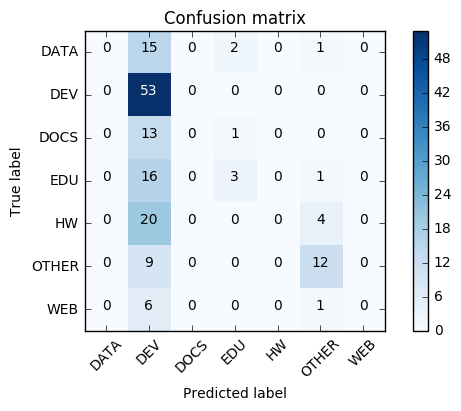

In [13]:
analyze_results(logreg)

## SVM

In [14]:
svm = sklearn.svm.SVC(C=20.0, random_state=1337)
svm.fit(data_train, y_train)

SVC(C=20.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1337, shrinking=True,
  tol=0.001, verbose=False)

acc train: 0.563573883162
acc test: 0.477707006369
Confusion matrix, without normalization
[[ 2 11  0  3  0  2  0]
 [ 0 50  0  1  0  2  0]
 [ 1 12  0  1  0  0  0]
 [ 1  8  0  8  0  3  0]
 [ 0 14  0  2  0  8  0]
 [ 0  5  0  1  0 15  0]
 [ 0  6  0  0  0  1  0]]


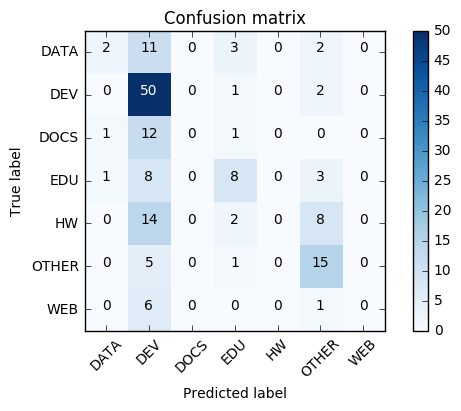

In [15]:
analyze_results(svm)

## DecisionTree

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dtc = DecisionTreeClassifier(random_state=1337)
dtc.fit(data_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1337, splitter='best')

acc train: 0.993127147766
acc test: 0.414012738854
Confusion matrix, without normalization
[[ 4  4  6  3  0  1  0]
 [ 3 33  3  4  5  4  1]
 [ 1  6  2  2  3  0  0]
 [ 4  1  2  6  3  4  0]
 [ 4  5  1  2  6  6  0]
 [ 0  2  2  2  1 14  0]
 [ 0  4  1  0  0  2  0]]


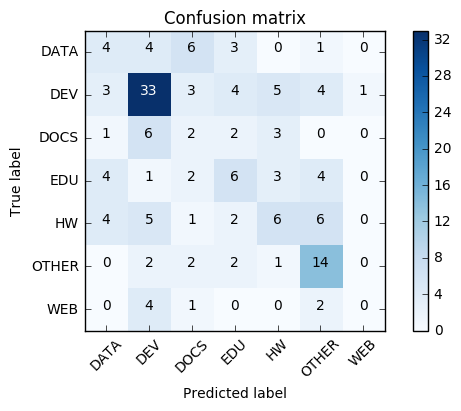

In [18]:
analyze_results(dtc)

## Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=100, random_state=1337)
rf.fit(data_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=1337,
            verbose=0, warm_start=False)

acc train: 0.993127147766
acc test: 0.496815286624
Confusion matrix, without normalization
[[ 4  8  2  1  2  1  0]
 [ 1 46  1  0  2  3  0]
 [ 2  7  2  2  1  0  0]
 [ 1  9  0  5  3  2  0]
 [ 0 12  1  2  6  3  0]
 [ 0  6  0  0  0 15  0]
 [ 0  5  1  0  0  1  0]]


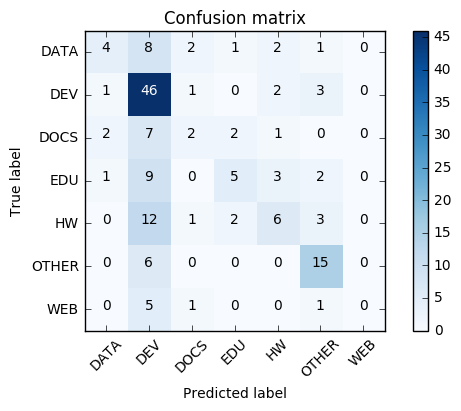

In [30]:
analyze_results(rf)

## NN

In [21]:
from sklearn.neural_network import MLPClassifier

In [22]:
mlp = MLPClassifier(max_iter=200, hidden_layer_sizes=(100,), random_state=1337)
mlp.fit(data_train, y_train)

/Users/mbornstein/anaconda/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1337,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

acc train: 0.560137457045
acc test: 0.490445859873
Confusion matrix, without normalization
[[ 4 10  0  2  0  2  0]
 [ 0 51  0  1  0  1  0]
 [ 1 12  0  1  0  0  0]
 [ 3  7  0  7  0  3  0]
 [ 0 14  0  2  0  8  0]
 [ 0  5  0  1  0 15  0]
 [ 0  6  0  0  0  1  0]]


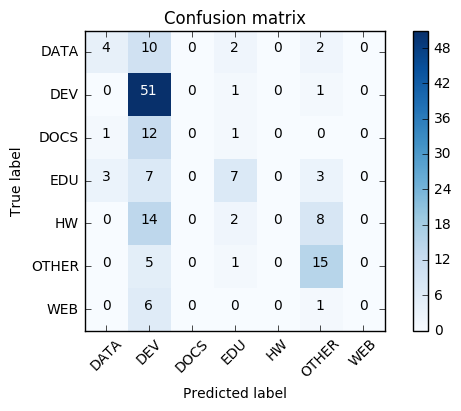

In [23]:
analyze_results(mlp)

## Two Step Stuff

In [24]:
from TwoStepClassifier import TwoStepClassifier

ImportError: No module named 'TwoStepClassifier'

In [ ]:
tsc = TwoStepClassifier(
    sklearn.linear_model.LogisticRegression(C=1.0, max_iter=100, n_jobs=2),
    RandomForestClassifier(n_estimators=100, random_state=1337)
)
tsc.fit(data_train, y_train)

In [ ]:
tsc.score(data_test, y_test)

In [ ]:
analyze_results(tsc)